In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Geographic Segmentation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/feynnlabs/Project-2-vehicle_booking_segmentation/India_geographic_vehicle_data.csv")

In [4]:
df.head()

,Country,State,Year,Total Registered Motor Vehicles (UOM:Number),Percentage Share (UOM:%(Percentage)),Vehicle Class,Category Of Vehicle,Production Of Motor Vehicles (UOM:Number),Year.1
0,India,Jharkhand,"Financial Year (Apr - Mar), 2017",3385347.0,1.24,Two Wheelers,Electric Two Wheelers,NaN,"Financial Year (Apr - Mar), 2016"
1,India,Jharkhand,"Financial Year (Apr - Mar), 2015",2477018.0,1.08,Two-Wheelers,Motor Cycles,2183785.0,"Financial Year (Apr - Mar), 2000"
2,India,The Dadra And Nagar Haveli And Daman And Diu,"Financial Year (Apr - Mar), 2017",117526.0,0.02,Passenger Vehicles,Utility Vehicles,219498.0,"Financial Year (Apr - Mar), 2008"
3,India,Nagaland,"Financial Year (Apr - Mar), 2018",489688.0,0.17,Commercial Vehicles,Light Commercial Vehicles (LCVs),225724.0,"Financial Year (Apr - Mar), 2006"
4,India,Meghalaya,"Financial Year (Apr - Mar), 2016",583107.0,0.23,Commercial Vehicles,M & HCVs (Medium & Heavy Commercial Vehicles),181242.0,"Financial Year (Apr - Mar), 2020"


In [5]:
df.columns

Index(['Country', 'State', 'Year',
       'Total Registered Motor Vehicles (UOM:Number)',
       'Percentage Share (UOM:%(Percentage))', 'Vehicle Class',
       'Category Of Vehicle', 'Production Of Motor Vehicles (UOM:Number)',
       'Year.1'],
      dtype='object')

In [6]:
df.describe()

,Total Registered Motor Vehicles (UOM:Number),Percentage Share (UOM:%(Percentage)),Production Of Motor Vehicles (UOM:Number)
count,1.800000e+02,180.000000,1.860000e+02
mean,7.655552e+06,2.793806,1.854042e+06
std,9.265779e+06,3.312293,3.293697e+06
min,1.600800e+04,0.010000,0.000000e+00
25%,3.821062e+05,0.170000,2.383240e+05
50%,3.385347e+06,1.250000,5.605270e+05
75%,1.118154e+07,4.020000,1.261130e+06
max,3.778626e+07,12.120000,1.649942e+07


In [7]:
df.shape

(207, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       180 non-null    object 
 1   State                                         180 non-null    object 
 2   Year                                          180 non-null    object 
 3   Total Registered Motor Vehicles (UOM:Number)  180 non-null    float64
 4   Percentage Share (UOM:%(Percentage))          180 non-null    float64
 5   Vehicle Class                                 207 non-null    object 
 6   Category Of Vehicle                           207 non-null    object 
 7   Production Of Motor Vehicles (UOM:Number)     186 non-null    float64
 8   Year.1                                        207 non-null    object 
dtypes: float64(3), object(6)
memory usage: 14.7+ KB


In [9]:
#Checking null values
df.isnull().sum()

,0
Country,27
State,27
Year,27
Total Registered Motor Vehicles (UOM:Number),27
Percentage Share (UOM:%(Percentage)),27
Vehicle Class,0
Category Of Vehicle,0
Production Of Motor Vehicles (UOM:Number),21
Year.1,0


In [10]:
#Handling Missing Data
df['Total Registered Motor Vehicles (UOM:Number)'].fillna(df['Total Registered Motor Vehicles (UOM:Number)'].mean(), inplace=True)
df['Percentage Share (UOM:%(Percentage))'].fillna(df['Percentage Share (UOM:%(Percentage))'].mean(), inplace=True)
df['Production Of Motor Vehicles (UOM:Number)'].fillna(df['Production Of Motor Vehicles (UOM:Number)'].mean(), inplace=True)
df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0], inplace=True)
df['Category Of Vehicle'].fillna(df['Category Of Vehicle'].mode()[0], inplace=True)
print(df.isnull().sum())

Country                                         27
State                                           27
Year                                            27
Total Registered Motor Vehicles (UOM:Number)     0
Percentage Share (UOM:%(Percentage))             0
Vehicle Class                                    0
Category Of Vehicle                              0
Production Of Motor Vehicles (UOM:Number)        0
Year.1                                           0
dtype: int64


<ipython-input-10-8dc892af2afc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Registered Motor Vehicles (UOM:Number)'].fillna(df['Total Registered Motor Vehicles (UOM:Number)'].mean(), inplace=True)
<ipython-input-10-8dc892af2afc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [11]:
#Preprocessing
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['Year'].fillna(df['Year'].mode()[0], inplace=True)
print(df.isnull().sum())

Country                                         0
State                                           0
Year                                            0
Total Registered Motor Vehicles (UOM:Number)    0
Percentage Share (UOM:%(Percentage))            0
Vehicle Class                                   0
Category Of Vehicle                             0
Production Of Motor Vehicles (UOM:Number)       0
Year.1                                          0
dtype: int64


<ipython-input-11-996b8c4fbb9c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna(df['Country'].mode()[0], inplace=True)
<ipython-input-11-996b8c4fbb9c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [12]:
df_encoded = pd.get_dummies(df, columns=['Vehicle Class', 'Category Of Vehicle'], drop_first=True)
numeric_cols = ['Total Registered Motor Vehicles (UOM:Number)', 'Percentage Share (UOM:%(Percentage))', 'Production Of Motor Vehicles (UOM:Number)']
df_scaled = df_encoded[numeric_cols]
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
print(df_scaled[:5])

[[0.08920617 0.10156895 0.11237009]
 [0.06515737 0.08835673 0.13235523]
 [0.00268778 0.00082576 0.01330337]
 [0.01254109 0.01321222 0.01368072]
 [0.01501444 0.0181668  0.01098475]]


In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)
print(df_encoded[['Total Registered Motor Vehicles (UOM:Number)', 'Production Of Motor Vehicles (UOM:Number)', 'Cluster']].head())

   Total Registered Motor Vehicles (UOM:Number)  \
0                                     3385347.0   
1                                     2477018.0   
2                                      117526.0   
3                                      489688.0   
4                                      583107.0   

   Production Of Motor Vehicles (UOM:Number)  Cluster  
0                               1.854042e+06        3  
1                               2.183785e+06        3  
2                               2.194980e+05        3  
3                               2.257240e+05        3  
4                               1.812420e+05        3  


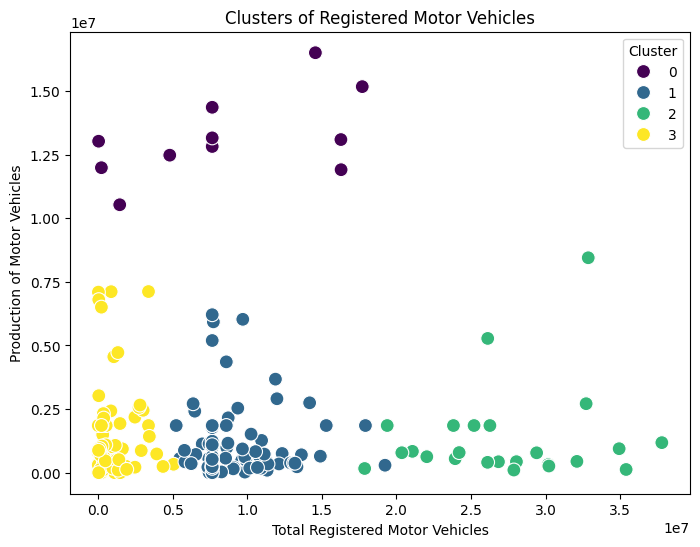

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_encoded['Total Registered Motor Vehicles (UOM:Number)'],
                y=df_encoded['Production Of Motor Vehicles (UOM:Number)'],
                hue=df_encoded['Cluster'], palette='viridis', s=100)
plt.title('Clusters of Registered Motor Vehicles')
plt.xlabel('Total Registered Motor Vehicles')
plt.ylabel('Production of Motor Vehicles')
plt.legend(title='Cluster')
plt.show()

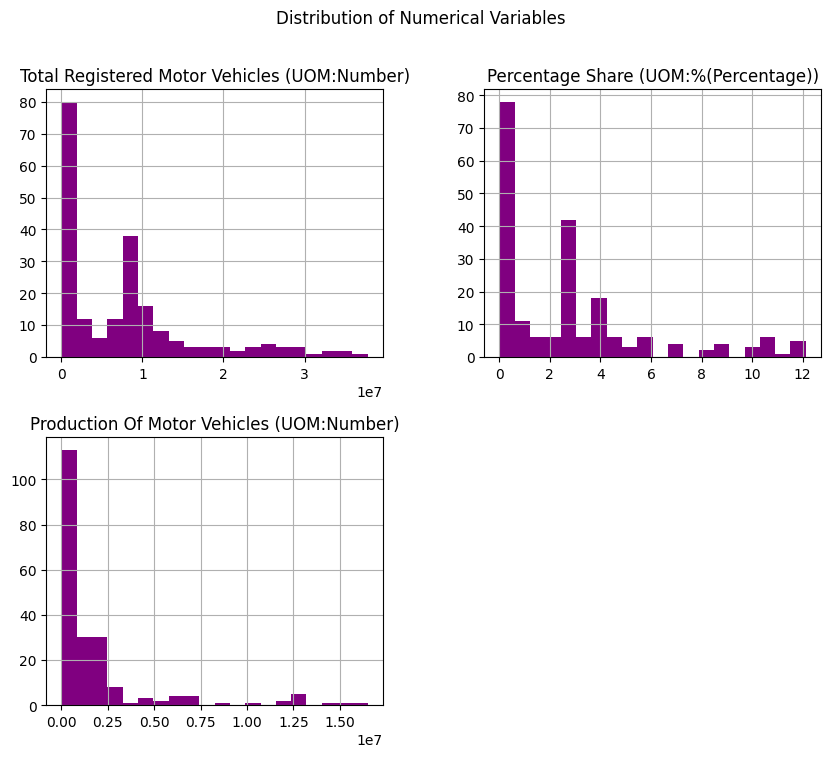

In [15]:
df_encoded[numeric_cols].hist(bins=20, figsize=(10, 8),color='purple')
plt.suptitle('Distribution of Numerical Variables')
plt.show()

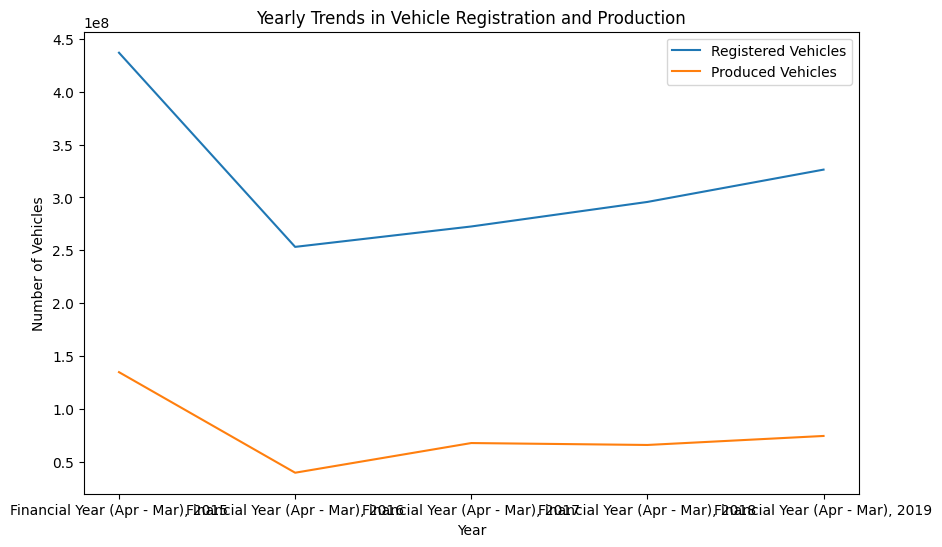

In [16]:
yearly_trends = df.groupby('Year').agg({
    'Total Registered Motor Vehicles (UOM:Number)': 'sum',
    'Production Of Motor Vehicles (UOM:Number)': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['Year'], yearly_trends['Total Registered Motor Vehicles (UOM:Number)'], label='Registered Vehicles')
plt.plot(yearly_trends['Year'], yearly_trends['Production Of Motor Vehicles (UOM:Number)'], label='Produced Vehicles')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Yearly Trends in Vehicle Registration and Production')
plt.legend()
plt.show()

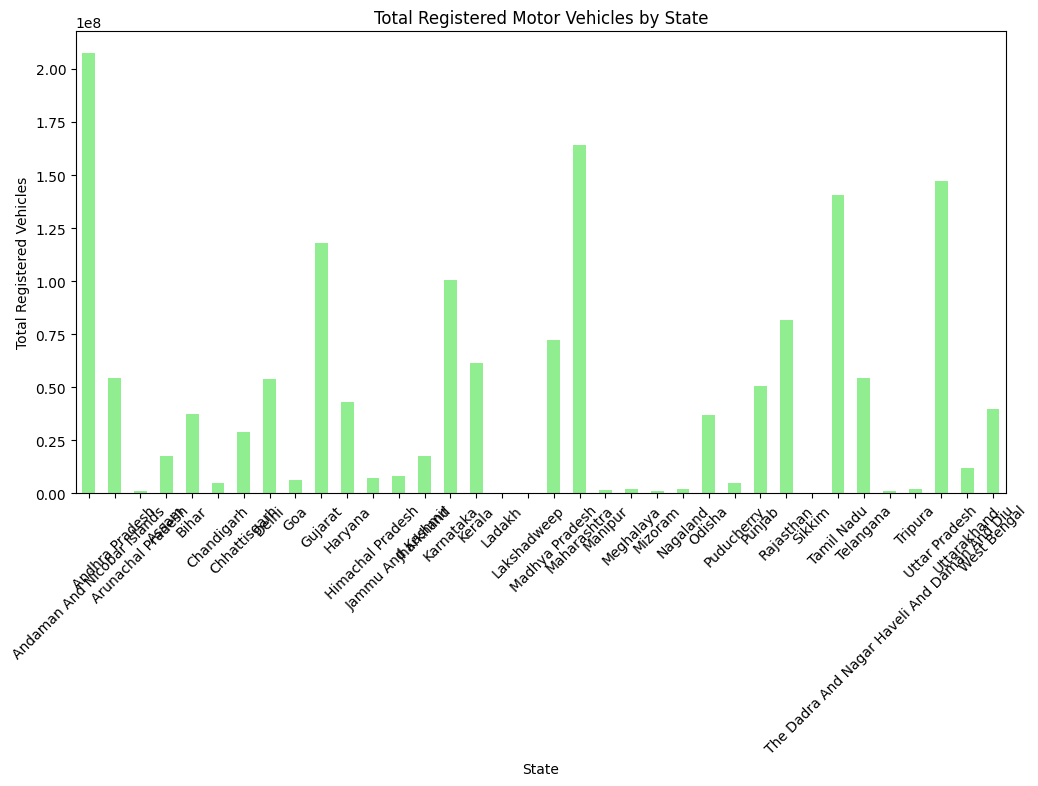

In [17]:
#Total Registered Motor Vehicles by State
vehicles_by_state = df.groupby('State')['Total Registered Motor Vehicles (UOM:Number)'].sum()
vehicles_by_state.plot(kind='bar', figsize=(12, 6), color="lightgreen", title="Total Registered Motor Vehicles by State")
plt.xlabel("State")
plt.ylabel("Total Registered Vehicles")
plt.xticks(rotation=45)
plt.show()

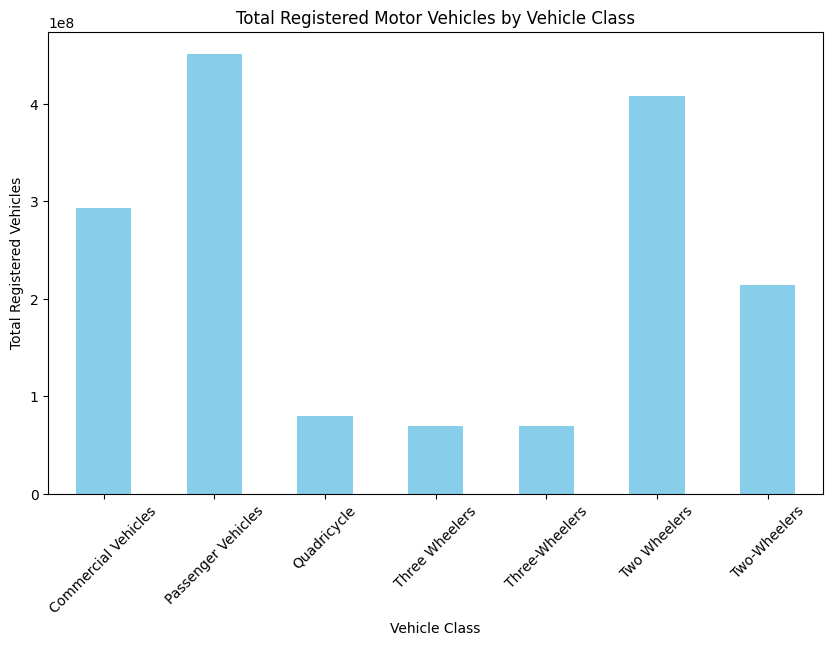

In [18]:
#Total Registered Motor Vehicles by Vehicle Class
vehicles_by_class = df.groupby('Vehicle Class')['Total Registered Motor Vehicles (UOM:Number)'].sum()
vehicles_by_class.plot(kind='bar', figsize=(10, 6), color="skyblue", title="Total Registered Motor Vehicles by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Total Registered Vehicles")
plt.xticks(rotation=45)
plt.show()

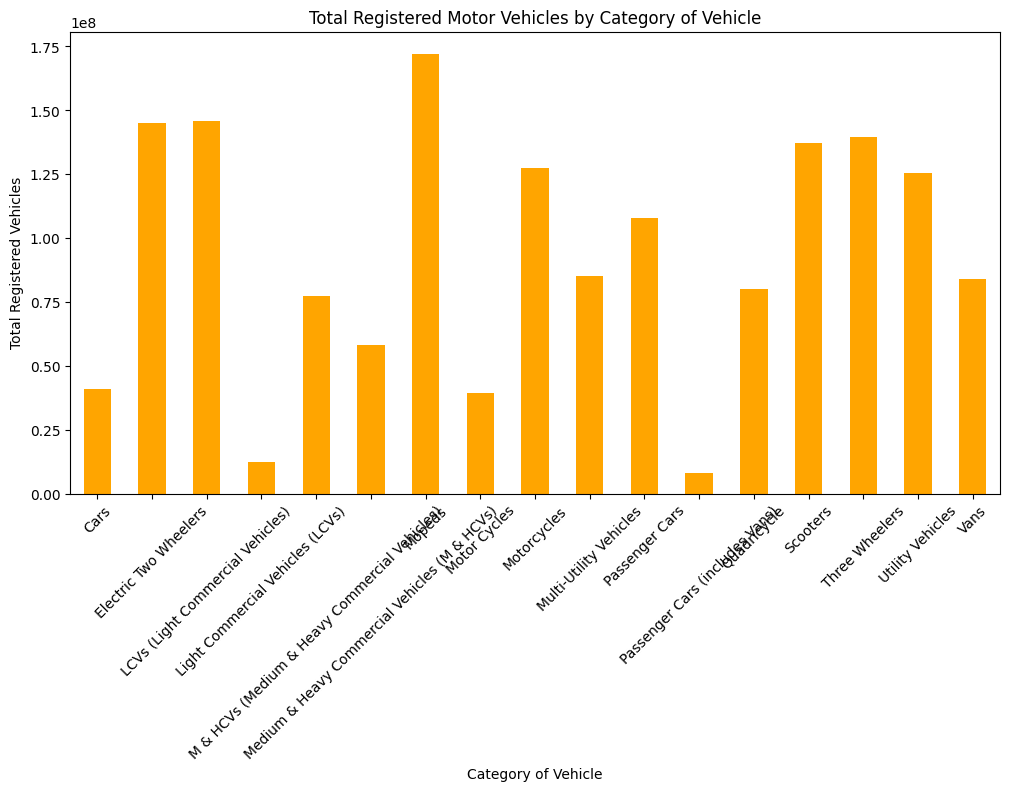

In [19]:
#Total Registered Motor Vehicles by Category of Vehicle
vehicles_by_category = df.groupby('Category Of Vehicle')['Total Registered Motor Vehicles (UOM:Number)'].sum()
vehicles_by_category.plot(kind='bar', figsize=(12, 6), color="orange", title="Total Registered Motor Vehicles by Category of Vehicle")
plt.xlabel("Category of Vehicle")
plt.ylabel("Total Registered Vehicles")
plt.xticks(rotation=45)
plt.show()

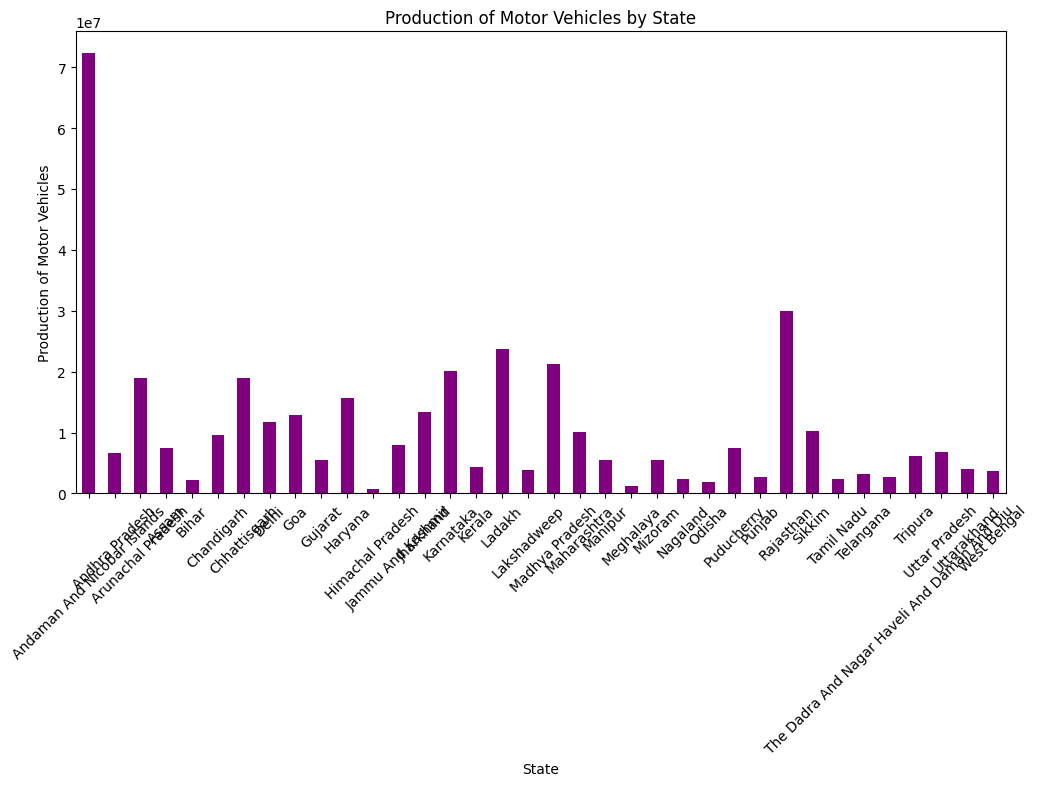

In [20]:
#Production of Motor Vehicles by State
production_by_state = df.groupby('State')['Production Of Motor Vehicles (UOM:Number)'].sum()
production_by_state.plot(kind='bar', figsize=(12, 6), color="purple", title="Production of Motor Vehicles by State")
plt.xlabel("State")
plt.ylabel("Production of Motor Vehicles")
plt.xticks(rotation=45)
plt.show()

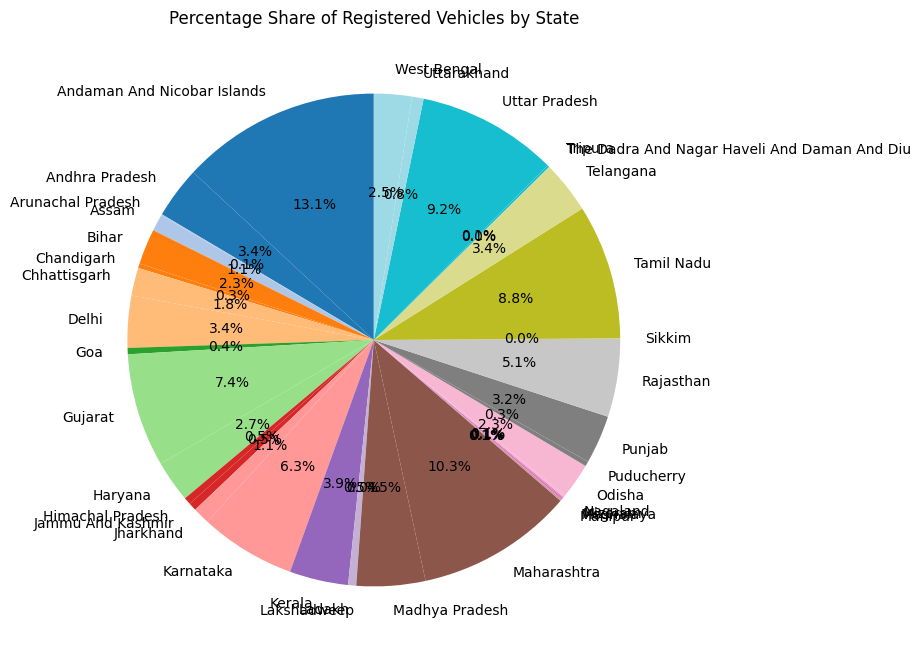

In [21]:
#Percentage Share of Registered Vehicles by State
share_by_state = df.groupby('State')['Percentage Share (UOM:%(Percentage))'].sum()
plt.figure(figsize=(10, 8))
share_by_state.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20', legend=False)
plt.title("Percentage Share of Registered Vehicles by State")
plt.ylabel("")
plt.show()

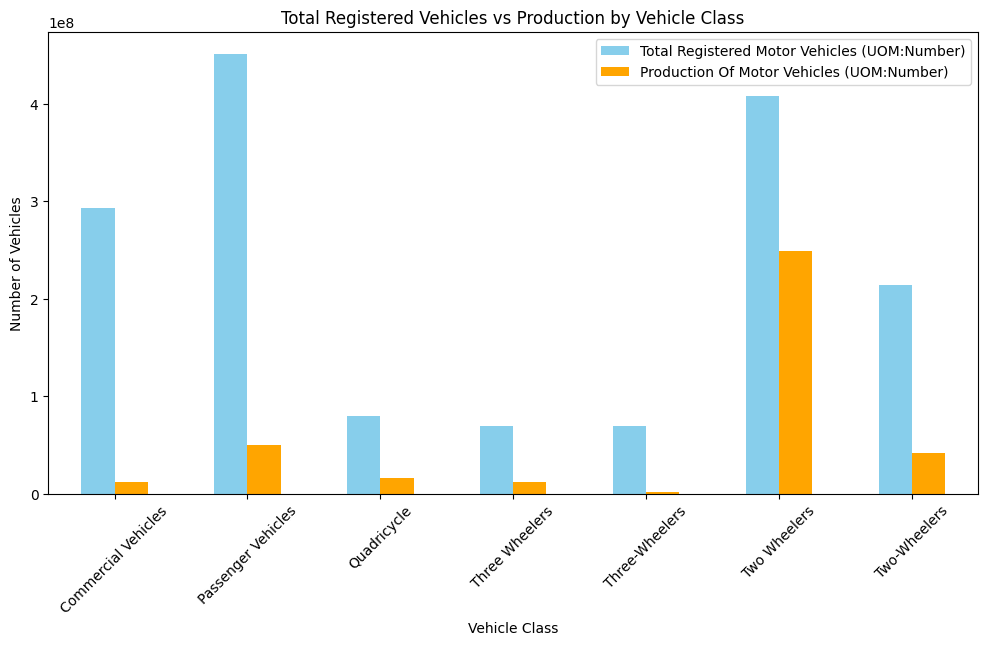

In [22]:
#Total Registered Vehicles and Production by Vehicle Class
vehicles_class_summary = df.groupby('Vehicle Class').agg({
    'Total Registered Motor Vehicles (UOM:Number)': 'sum',
    'Production Of Motor Vehicles (UOM:Number)': 'sum'
}).reset_index()
vehicles_class_summary.plot(x='Vehicle Class', kind='bar', figsize=(12, 6), color=['skyblue', 'orange'], title="Total Registered Vehicles vs Production by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()

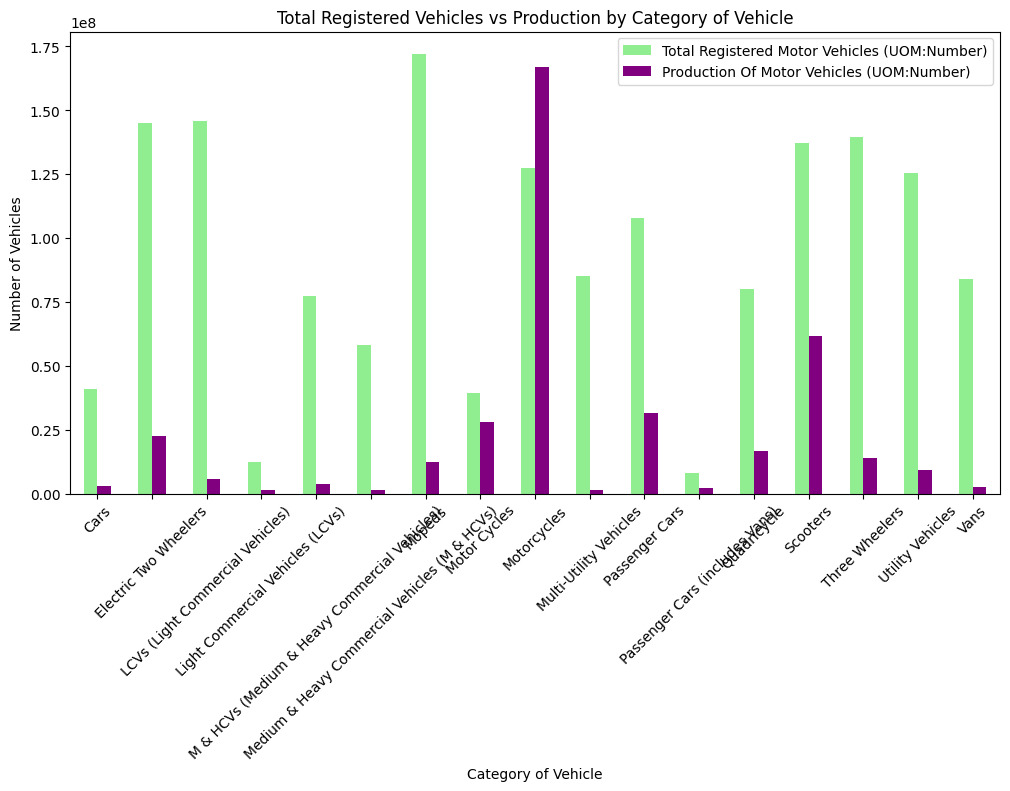

In [23]:
#Total Registered Vehicles and Production by Category of Vehicle
category_summary = df.groupby('Category Of Vehicle').agg({
    'Total Registered Motor Vehicles (UOM:Number)': 'sum',
    'Production Of Motor Vehicles (UOM:Number)': 'sum'
}).reset_index()

category_summary.plot(x='Category Of Vehicle', kind='bar', figsize=(12, 6), color=['lightgreen', 'purple'], title="Total Registered Vehicles vs Production by Category of Vehicle")
plt.xlabel("Category of Vehicle")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()

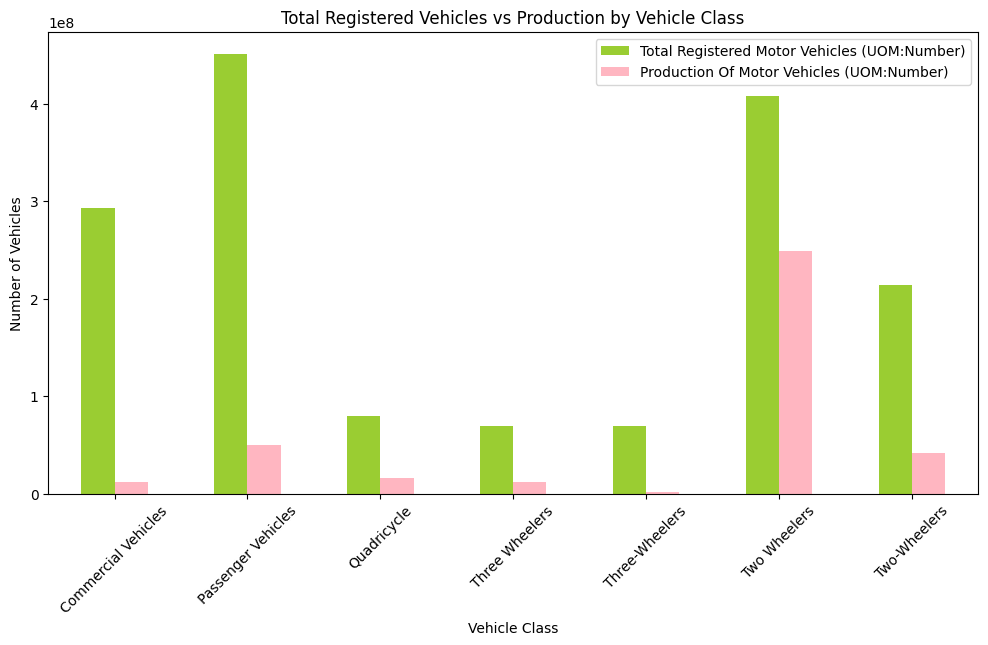

In [24]:
#Comparing Production and Registration by Vehicle Class
class_summary = df.groupby('Vehicle Class').agg({
    'Total Registered Motor Vehicles (UOM:Number)': 'sum',
    'Production Of Motor Vehicles (UOM:Number)': 'sum'
}).reset_index()
class_summary.plot(x='Vehicle Class', kind='bar', figsize=(12, 6), color=['yellowgreen', 'lightpink'], title="Total Registered Vehicles vs Production by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()

# Demographic, Psychographic and Behavioral Segmentation

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('/content/drive/MyDrive/feynnlabs/Project-2-vehicle_booking_segmentation/cabs_data.csv')

In [28]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [29]:
# checking the shape
df.shape

(131662, 14)

In [30]:
# basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

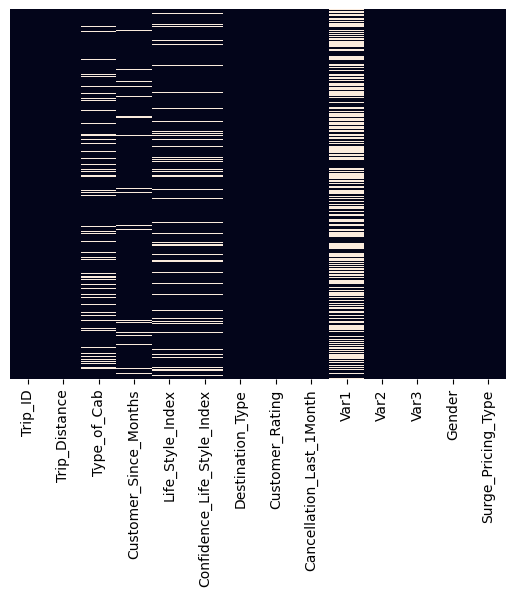

In [31]:
ax = sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [32]:
df.select_dtypes(include= 'object').columns

Index(['Trip_ID', 'Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'],
      dtype='object')

In [33]:
df.isnull().sum()

,0
Trip_ID,0
Trip_Distance,0
Type_of_Cab,20210
Customer_Since_Months,5920
Life_Style_Index,20193
Confidence_Life_Style_Index,20193
Destination_Type,0
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,71030


In [34]:
round(df.isnull().mean().sort_values(ascending=False)*100, 2)

,0
Var1,53.95
Type_of_Cab,15.35
Life_Style_Index,15.34
Confidence_Life_Style_Index,15.34
Customer_Since_Months,4.50
Trip_ID,0.00
Trip_Distance,0.00
Destination_Type,0.00
Customer_Rating,0.00
Cancellation_Last_1Month,0.00


## Treating the Null values



### Type_of_Cab

In [35]:
# checking value counts
df.Type_of_Cab.value_counts(dropna=False)

,count
Type_of_Cab,
B,31136
C,28122
A,21569
NaN,20210
D,18991
E,11634


In [36]:
# %age wise
df.Type_of_Cab.value_counts(normalize=True, dropna=False)

,proportion
Type_of_Cab,
B,0.236484
C,0.213592
A,0.163821
NaN,0.153499
D,0.144241
E,0.088363


In [37]:
df.Type_of_Cab.mode()[0]

'B'

In [38]:
# Replacing NaN with B (most frequent)
df.Type_of_Cab = df.Type_of_Cab.fillna('B')

In [39]:
# sanity check
df.Type_of_Cab.value_counts(dropna=False)

,count
Type_of_Cab,
B,51346
C,28122
A,21569
D,18991
E,11634


In [40]:
df.Type_of_Cab.isnull().sum()

0

### Customer Since in Months

In [41]:
# checking type
df.Customer_Since_Months.dtype

dtype('float64')

In [42]:
# checking value counts
df.Customer_Since_Months.value_counts()

,count
Customer_Since_Months,
10.0,42680
2.0,11621
3.0,10351
0.0,10169
5.0,8641
1.0,8297
4.0,7726
7.0,7407
6.0,7375


In [43]:
# checkimg the range of values
df.Customer_Since_Months.describe()

,Customer_Since_Months
count,125742.000000
mean,6.016661
std,3.626887
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,10.000000


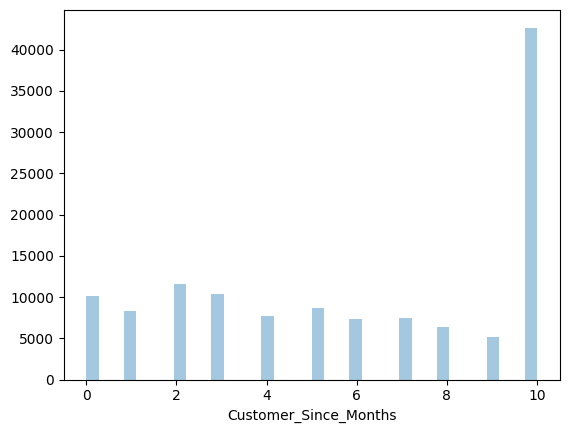

In [44]:
sns.distplot(df.Customer_Since_Months, kde=False)
plt.show()

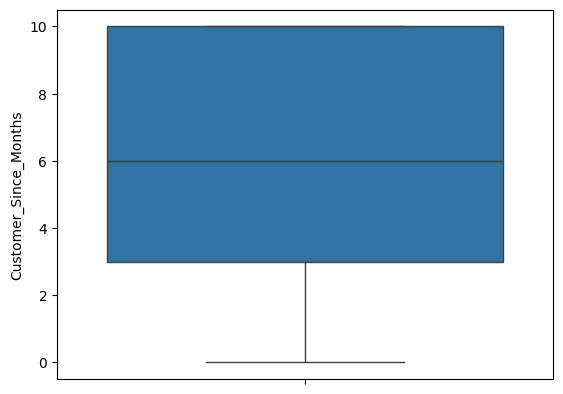

In [45]:
ax = sns.boxplot(df.Customer_Since_Months)

In [46]:
print(df.Customer_Since_Months.mean())
print(df.Customer_Since_Months.median())
print(df.Customer_Since_Months.mode()[0])

6.016661099712109
6.0
10.0


In [47]:
# filling the missing values with median

df.Customer_Since_Months = df.Customer_Since_Months.fillna(df.Customer_Since_Months.median())

In [48]:
# sanity check
df.Customer_Since_Months.isnull().sum()

0

### Life Style Index

In [49]:
df.Life_Style_Index.dtype

dtype('float64')

In [50]:
df.Life_Style_Index.describe()

,Life_Style_Index
count,111469.000000
mean,2.802064
std,0.225796
min,1.596380
25%,2.654730
50%,2.798050
75%,2.946780
max,4.875110


<Axes: xlabel='Life_Style_Index'>

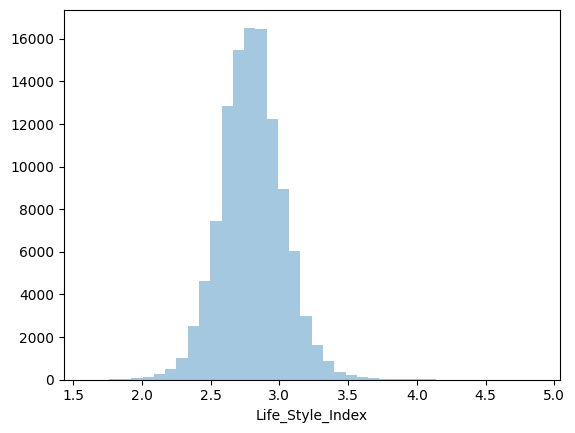

In [51]:
# checking the distribution of values
sns.distplot(df.Life_Style_Index, kde=False, bins=40)

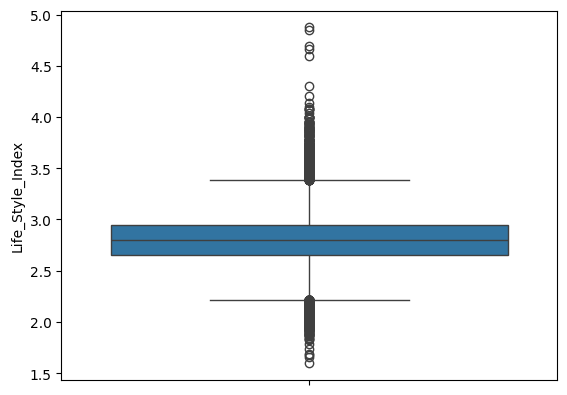

In [52]:
# boxplot
ax = sns.boxplot(df.Life_Style_Index)

In [53]:
df.Life_Style_Index.describe(percentiles=[0.05, .25, .50, .75, .90, .95, .99])

,Life_Style_Index
count,111469.000000
mean,2.802064
std,0.225796
min,1.596380
5%,2.445944
25%,2.654730
50%,2.798050
75%,2.946780
90%,3.080032
95%,3.174166


In [54]:
df.Life_Style_Index.quantile([0.05, .25, .50, .75, .90, .95, .99])

,Life_Style_Index
0.05,2.445944
0.25,2.654730
0.50,2.798050
0.75,2.946780
0.90,3.080032
0.95,3.174166
0.99,3.381022


In [55]:
# upper fence limit (uf)
uf = 2.946 + 1.5*(2.946-2.654)
uf

3.3840000000000003

In [56]:
# lower fence limit (lf)
lf = 2.654 - 1.5*(2.946-2.654)
lf

2.2159999999999993

In [57]:
# imputing the missing values
df.Life_Style_Index = df.Life_Style_Index.fillna(4)

In [58]:
# sanity check for missing values
df.Life_Style_Index.isnull().sum()

0

### Confidence Life Style Index

In [59]:
# checking dtype
df.Confidence_Life_Style_Index.dtype

dtype('O')

In [60]:
# checking value counts
df.Confidence_Life_Style_Index.value_counts()

,count
Confidence_Life_Style_Index,
B,40355
C,35967
A,35147


In [61]:
# checking mode
df.Confidence_Life_Style_Index.mode()[0]

'B'

In [62]:
# imputing missing values with most frequent value i.e. 'B'
df.Confidence_Life_Style_Index = df.Confidence_Life_Style_Index.fillna('B')

In [63]:
df.Confidence_Life_Style_Index.value_counts(dropna=False)

,count
Confidence_Life_Style_Index,
B,60548
C,35967
A,35147


In [64]:
df.Confidence_Life_Style_Index.isnull().sum()

0

### Var-1

In [65]:
df.Var1.dtype

dtype('float64')

In [66]:
df.Var1.isnull().sum()/len(df)*100

53.948747550546095

In [67]:
df.Var1.describe()

,Var1
count,60632.000000
mean,64.202698
std,21.820447
min,30.000000
25%,46.000000
50%,61.000000
75%,80.000000
max,210.000000


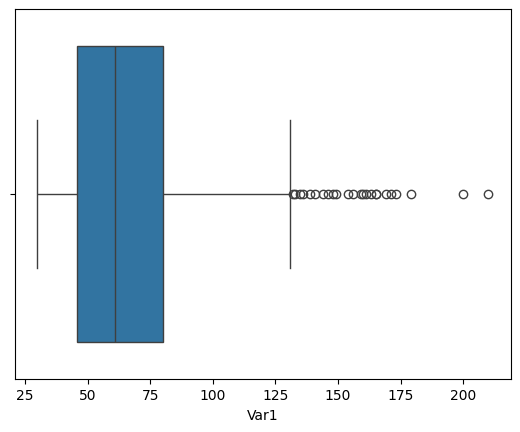

In [68]:
ax = sns.boxplot(x = df.Var1)

In [69]:
df.Var1.describe(percentiles=[0.05, .25, .50, .75, .90, .95, .99])

,Var1
count,60632.000000
mean,64.202698
std,21.820447
min,30.000000
5%,35.000000
25%,46.000000
50%,61.000000
75%,80.000000
90%,98.000000
95%,104.000000


In [70]:
# finding the permissible value of outer fence
uf = 80 + 1.5*(80-46)
uf

131.0

In [71]:
#
# capping the values to 131
df = df[( df.Var1 <= 131.0 )]

In [72]:
df.Var1.describe()

,Var1
count,60608.000000
mean,64.165622
std,21.741617
min,30.000000
25%,46.000000
50%,61.000000
75%,80.000000
max,131.000000


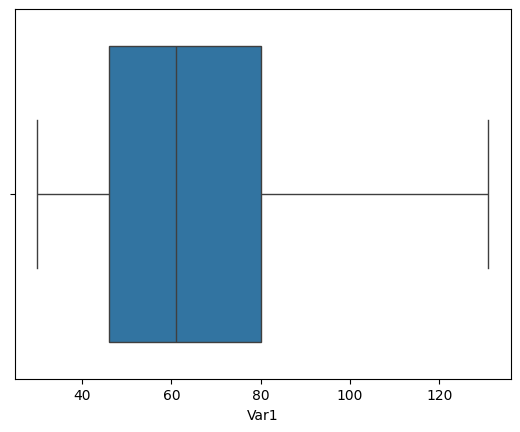

In [73]:
# sanity check for outliers
ax = sns.boxplot(x = df.Var1)

#### The outliers seems to be managed

In [74]:
# checking %age null values of Var1
df.Var1.isnull().sum()/len(df)*100

0.0

In [75]:
# checking null values again
df.Var1.isnull().sum()

0

In [76]:
# Checking the null values in data
df.isnull().sum()

,0
Trip_ID,0
Trip_Distance,0
Type_of_Cab,0
Customer_Since_Months,0
Life_Style_Index,0
Confidence_Life_Style_Index,0
Destination_Type,0
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,0


### All features have null values

In [77]:
# dropping the Id column

df = df.drop('Trip_ID', axis=1)
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.9050,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.4500,0,38.0,56,78,Male,2
4,54.95,C,10.0,3.03453,B,A,3.4025,4,51.0,49,102,Male,2
5,19.06,E,10.0,4.00000,B,A,2.5975,1,72.0,63,91,Male,3
6,29.72,E,10.0,2.83958,C,B,2.9750,1,83.0,50,75,Male,2


In [78]:
# creating categorical and numerical col

cat_col = []
num_col = []

for i in df.columns:
    if (df[i].dtypes == 'object'):
        cat_col.append(i)
    else:
        num_col.append(i)

In [79]:
cat_col

['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

In [80]:
num_col

['Trip_Distance',
 'Customer_Since_Months',
 'Life_Style_Index',
 'Customer_Rating',
 'Cancellation_Last_1Month',
 'Var1',
 'Var2',
 'Var3',
 'Surge_Pricing_Type']

## EDA and Data Visualization

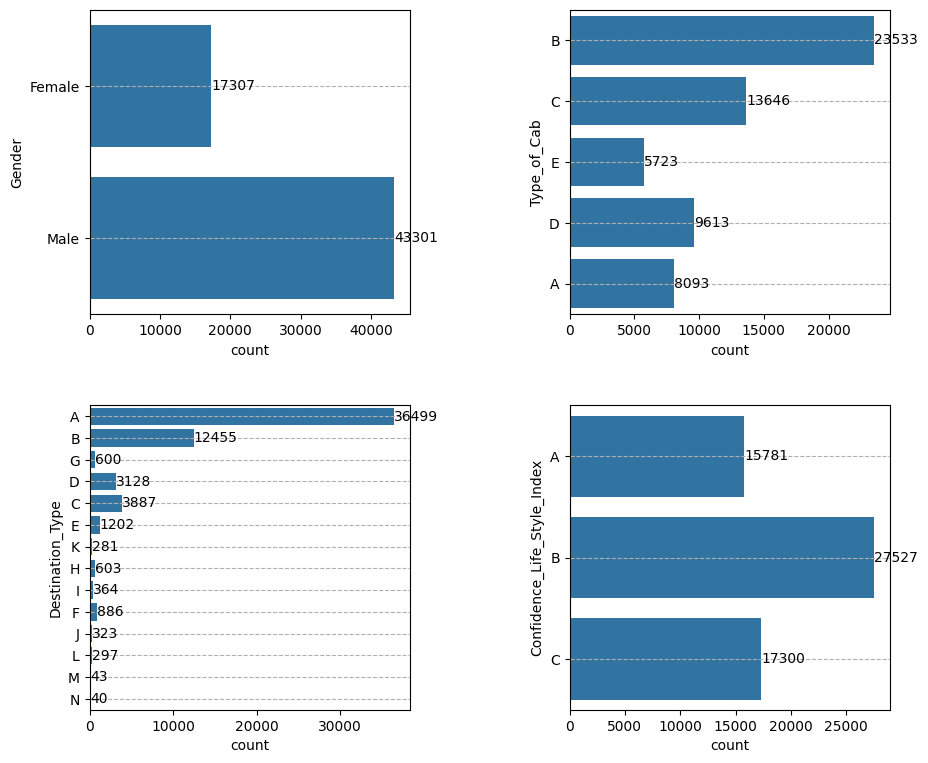

In [81]:
# plotting for different categorical features

plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
ax = sns.countplot(df.Gender)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(2,2,2)
ax = sns.countplot(df.Type_of_Cab)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(2,2,3)
ax = sns.countplot(df.Destination_Type)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(2,2,4)
ax = sns.countplot(df.Confidence_Life_Style_Index)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplots_adjust(left=0.2,
                    bottom=0.2,
                    right=1,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.3)
plt.show()

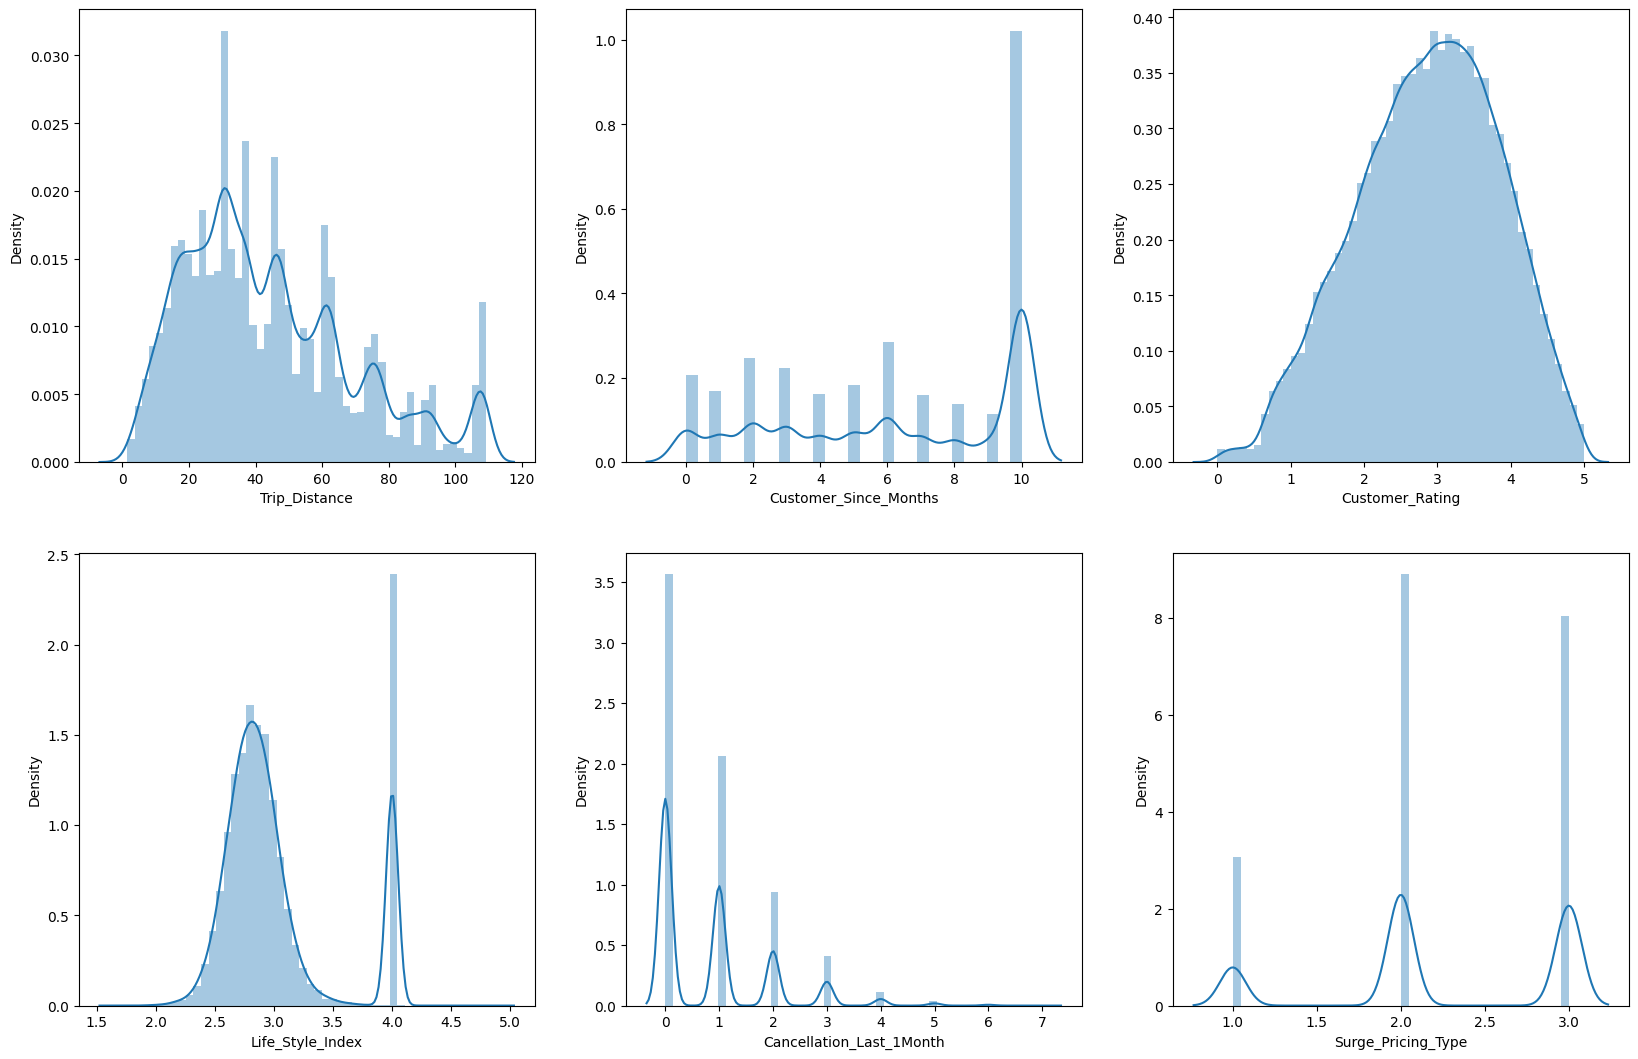

In [82]:
# plotting for numerical features

plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
ax = sns.distplot(df.Trip_Distance)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,2)
ax = sns.distplot(df.Customer_Since_Months)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,3)
ax = sns.distplot(df.Customer_Rating)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,4)
ax = sns.distplot(df.Life_Style_Index)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,5)
ax = sns.distplot(df.Cancellation_Last_1Month)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,6)
ax = sns.distplot(df.Surge_Pricing_Type)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

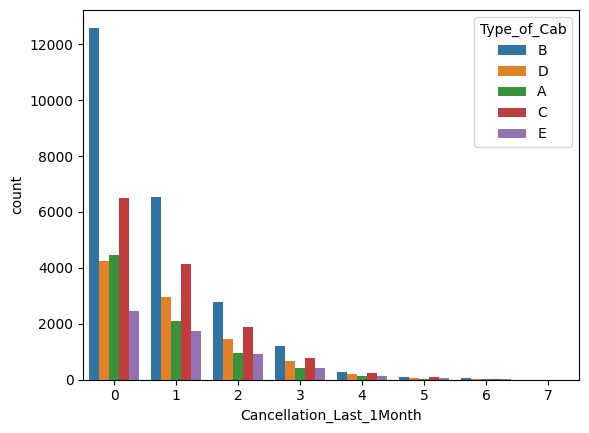

In [84]:
# plotting Cancellation_Last_1Month with Type of cab
ax = sns.countplot(x='Cancellation_Last_1Month', hue='Type_of_Cab', data=df)

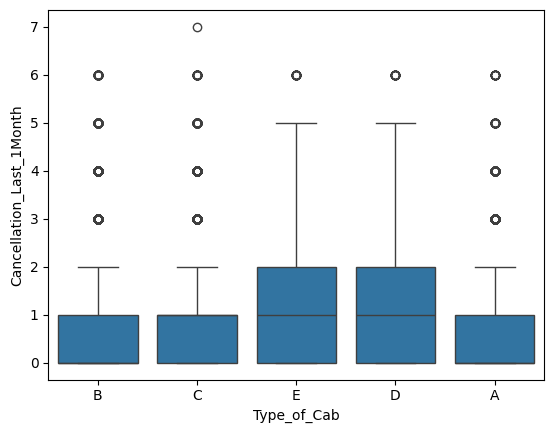

In [85]:
# plotting Cancellation_Last_1Month with Type of cab
ax = sns.boxplot(y = df.Cancellation_Last_1Month, x = df.Type_of_Cab )

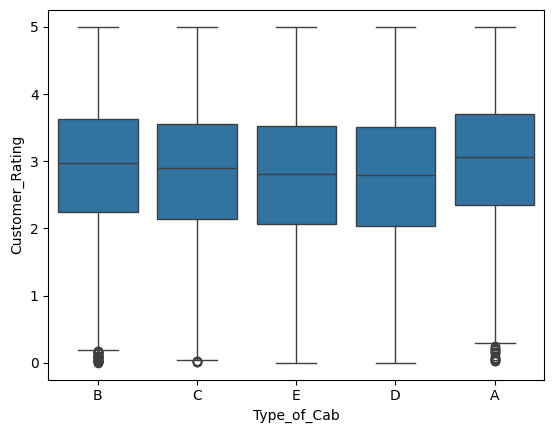

In [86]:
# plotting customer rating with type of cab
ax = sns.boxplot(y = df.Customer_Rating, x = df.Type_of_Cab )

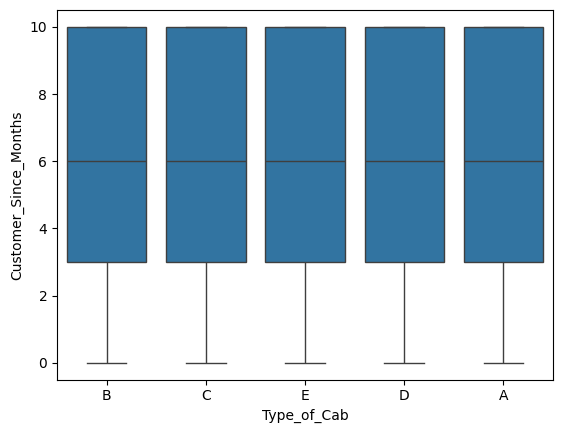

In [87]:
# plotting Customer_Since_Months with Type of cab

ax = sns.boxplot(y = df.Customer_Since_Months, x = df.Type_of_Cab)

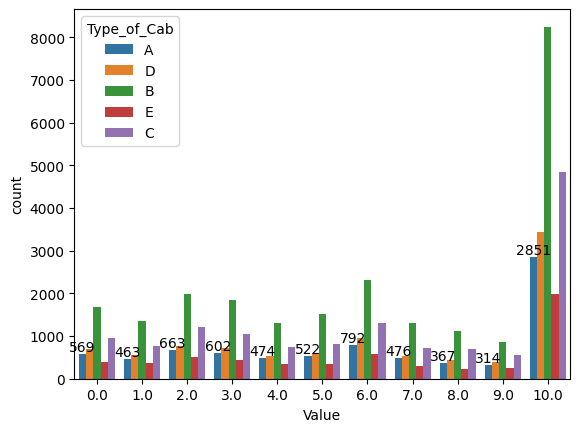

In [94]:
# Melt the DataFrame to long-form
df_melted = pd.melt(df, id_vars=['Type_of_Cab'], value_vars=['Customer_Since_Months'], var_name='Variable', value_name='Value')

# Create the countplot with hue
ax = sns.countplot(x='Value', hue='Type_of_Cab', data=df_melted)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

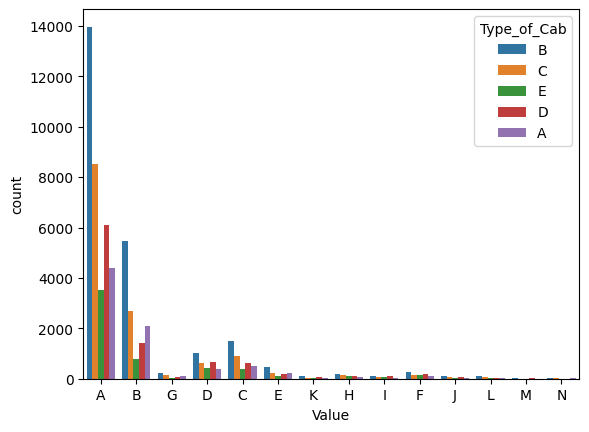

In [98]:
# Melt the DataFrame to long-form
df_melted = pd.melt(df, id_vars=['Type_of_Cab'], value_vars=['Destination_Type'], var_name='Variable', value_name='Value')

# Create the countplot with hue
ax = sns.countplot(x='Value', hue='Type_of_Cab', data=df_melted)
#ax.bar_label(ax.containers[0], label_type='edge') # This is optional
plt.show()

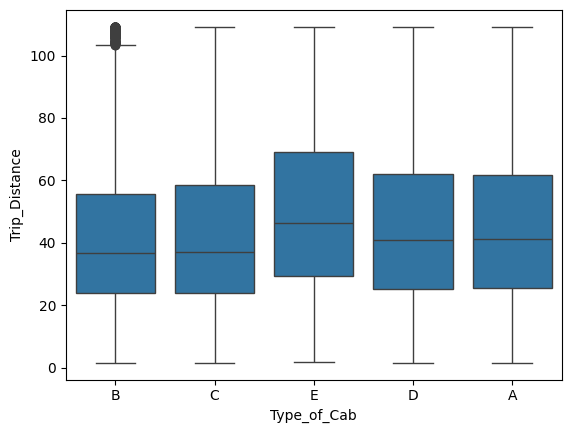

In [99]:
# ploting b/w Trip distance and type of cab

ax = sns.boxplot(y = df.Trip_Distance, x = df.Type_of_Cab)

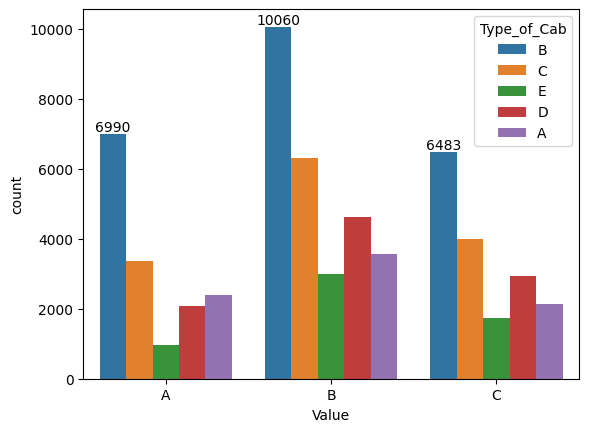

In [101]:
# ploting b/w Confidence_Life_Style_Index and Type_of_Cab

# Melt the DataFrame to long-form
df_melted = pd.melt(df, id_vars=['Type_of_Cab'], value_vars=['Confidence_Life_Style_Index'], var_name='Variable', value_name='Value')

# Create the countplot with hue
ax = sns.countplot(x='Value', hue='Type_of_Cab', data=df_melted)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

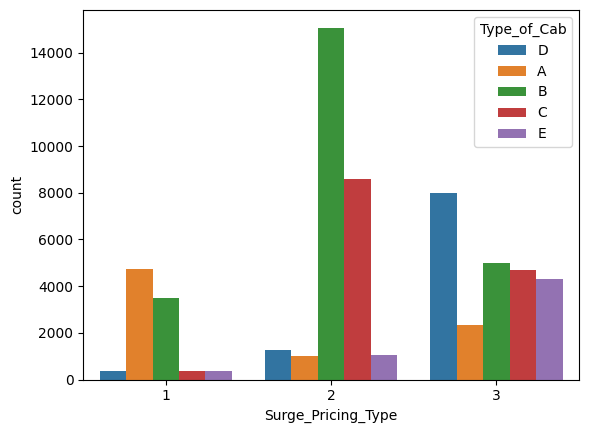

In [103]:
# ploting b/w Surge Pricing type and Type of cab
ax = sns.countplot(x='Surge_Pricing_Type', hue='Type_of_Cab', data=df)
plt.show()

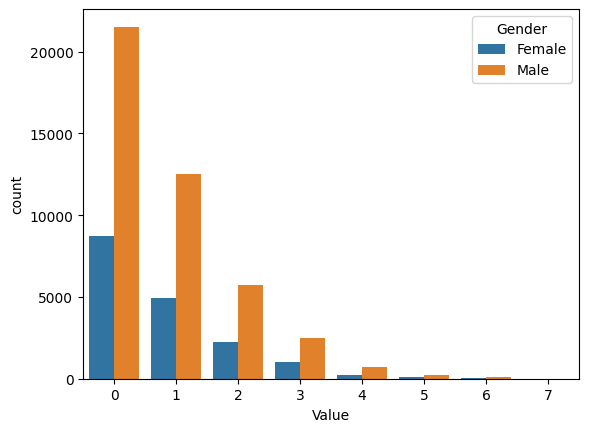

In [105]:
# checking cancellations_last_months w.r.t Gender
# Melt the DataFrame to long-form
df_melted = pd.melt(df, id_vars=['Gender'], value_vars=['Cancellation_Last_1Month'], var_name='Variable', value_name='Value')

# Create the countplot with hue
ax = sns.countplot(x='Value', hue='Gender', data=df_melted)
plt.show()

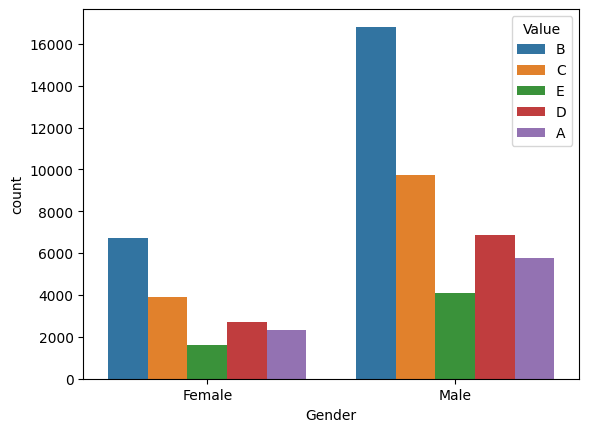

In [107]:
# Melt the DataFrame to long-form
df_melted = pd.melt(df, id_vars=['Gender'], value_vars=['Type_of_Cab'], var_name='Variable', value_name='Value')

# Create the countplot with hue
ax = sns.countplot(x='Gender', hue='Value', data=df_melted)
plt.show()

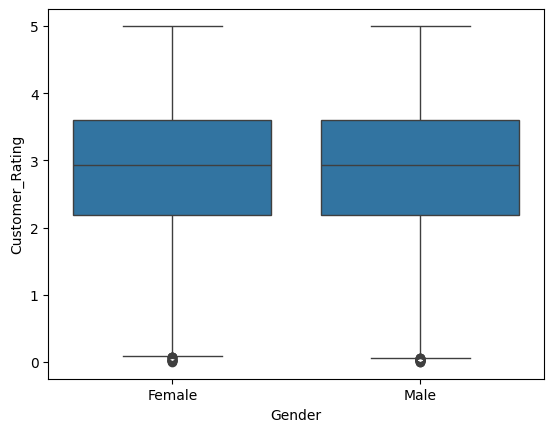

In [108]:
# ploting Customer rating Vs Gender

ax = sns.boxplot(y = df.Customer_Rating, x = df.Gender)

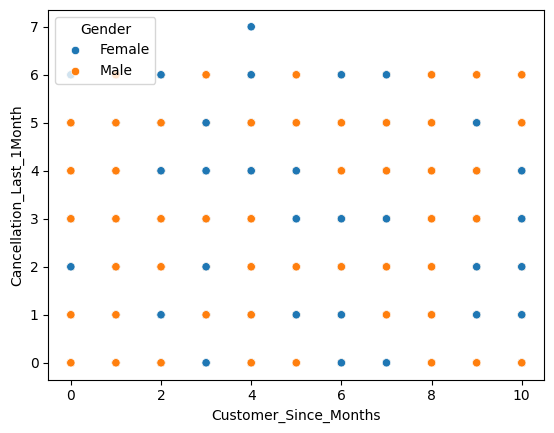

In [110]:
# plotting Customer_Since_Months Vs Cancellation_Last_1Month with Gender

sns.scatterplot(x=df.Customer_Since_Months, y=df.Cancellation_Last_1Month, hue=df.Gender) # Changed to keyword arguments
plt.show() #Added to display plot

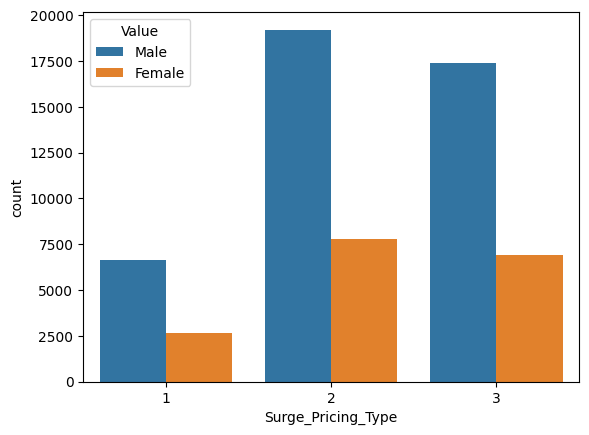

In [112]:
# ploting Surge_Pricing_Type Vs Gender

# Melt the DataFrame to long-form
df_melted = pd.melt(df, id_vars=['Surge_Pricing_Type'], value_vars=['Gender'], var_name='Variable', value_name='Value')

# Create the countplot with hue
ax = sns.countplot(x='Surge_Pricing_Type', hue='Value', data=df_melted)
plt.show()

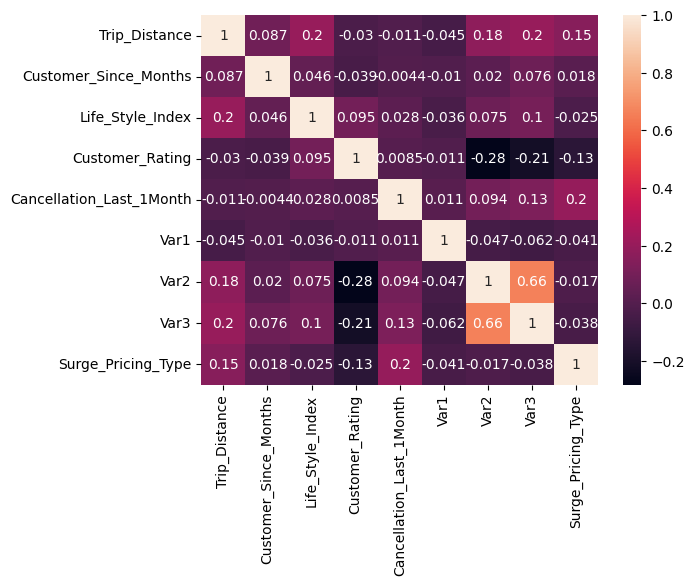

In [114]:
# checking correlation b/w columns

# Calculate correlations only for numeric columns
ax = sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

## Data Preprocessing

In [115]:
df.dtypes

,0
Trip_Distance,float64
Type_of_Cab,object
Customer_Since_Months,float64
Life_Style_Index,float64
Confidence_Life_Style_Index,object
Destination_Type,object
Customer_Rating,float64
Cancellation_Last_1Month,int64
Var1,float64
Var2,int64


In [116]:
columns = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
           'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3', 'Surge_Pricing_Type']

In [117]:
# StandardScaler for continous columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df[columns])

df.head(7)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
4,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
5,19.06,E,10.0,4.00000,B,A,2.59750,1,72.0,63,91,Male,3
6,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2
7,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2
10,46.07,D,10.0,2.95887,C,B,2.49125,2,89.0,48,69,Female,2


In [118]:
from sklearn.cluster import KMeans

In [119]:
# LabelEncoding for Categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Type_of_Cab"]=le.fit_transform(df["Type_of_Cab"])
df["Confidence_Life_Style_Index"] =le.fit_transform(df["Confidence_Life_Style_Index"])
df["Destination_Type"]=le.fit_transform(df["Destination_Type"])
df["Gender"]=le.fit_transform(df["Gender"])

In [120]:
df.head(7)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1,1.0,2.42769,0,0,3.90500,0,40.0,46,60,0,2
1,29.47,1,10.0,2.78245,1,0,3.45000,0,38.0,56,78,1,2
4,54.95,2,10.0,3.03453,1,0,3.40250,4,51.0,49,102,1,2
5,19.06,4,10.0,4.00000,1,0,2.59750,1,72.0,63,91,1,3
6,29.72,4,10.0,2.83958,2,1,2.97500,1,83.0,50,75,1,2
7,18.44,1,2.0,2.81871,1,0,3.58250,0,103.0,46,63,1,2
10,46.07,3,10.0,2.95887,2,1,2.49125,2,89.0,48,69,0,2


In [121]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

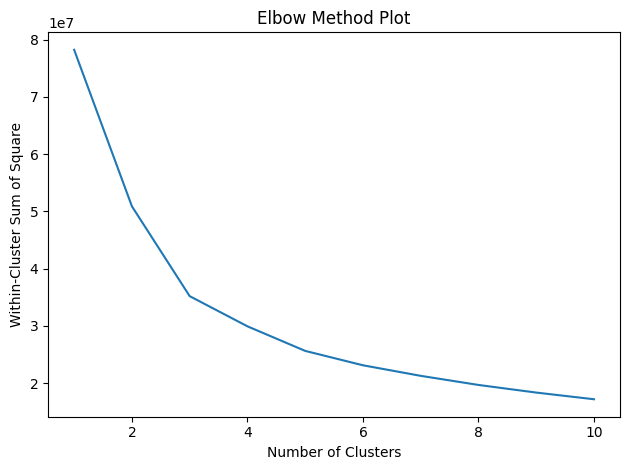

In [122]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [123]:
df.isnull().sum()

,0
Trip_Distance,0
Type_of_Cab,0
Customer_Since_Months,0
Life_Style_Index,0
Confidence_Life_Style_Index,0
Destination_Type,0
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,0
Var2,0


## Clustering using K-Means

In [124]:
#Forming clusters on various parameters using Kmeans : [groups customers with similar behaviour in one cluster]

c1 = df[['Trip_Distance', 'Life_Style_Index']]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(c1)
model.labels_

array([1, 1, 2, ..., 1, 2, 1], dtype=int32)

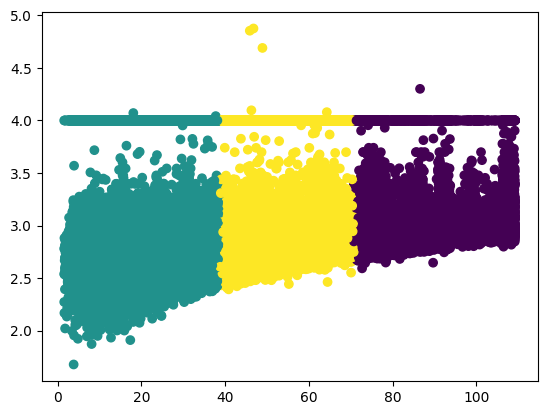

In [125]:
# making scatter plot b/w Trip_distance and Life_Style_Index
plt.scatter(c1.Trip_Distance, c1.Life_Style_Index, c=model.labels_)
plt.show()

In [126]:
c1 = df[["Trip_Distance","Life_Style_Index"]][0:50]

In [127]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(c1)
model.labels_

array([1, 3, 2, 1, 3, 1, 2, 3, 1, 0, 1, 2, 3, 1, 1, 0, 3, 0, 3, 3, 1, 2,
       2, 1, 2, 1, 2, 3, 0, 1, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 0, 1, 3, 2,
       1, 3, 2, 2, 0, 3])

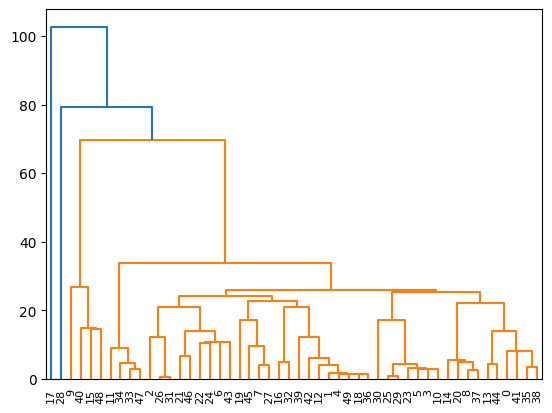

In [128]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(c1.values, c1.values))
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(DM))
plt.show()

In [129]:
c2 = df[['Trip_Distance', 'Customer_Rating']]

In [130]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(c2)
model.labels_

array([0, 0, 2, ..., 0, 2, 0], dtype=int32)

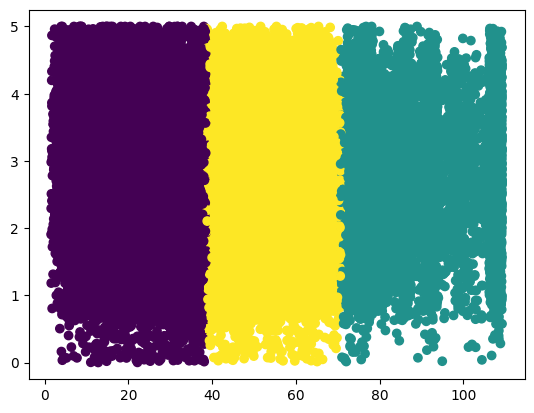

In [131]:
# scatter plot b/w Trip distance and Customer rating
plt.scatter(c2.Trip_Distance, c2.Customer_Rating, c=model.labels_)
plt.show()

In [132]:
c2 = df[["Trip_Distance","Customer_Rating"]][0:50]

In [133]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(c2)
model.labels_

array([2, 0, 3, 2, 0, 2, 0, 0, 2, 1, 2, 3, 0, 2, 2, 1, 0, 1, 0, 0, 2, 3,
       0, 2, 0, 2, 3, 0, 1, 2, 2, 3, 0, 3, 3, 2, 0, 2, 2, 0, 1, 2, 0, 0,
       2, 0, 3, 3, 1, 0])

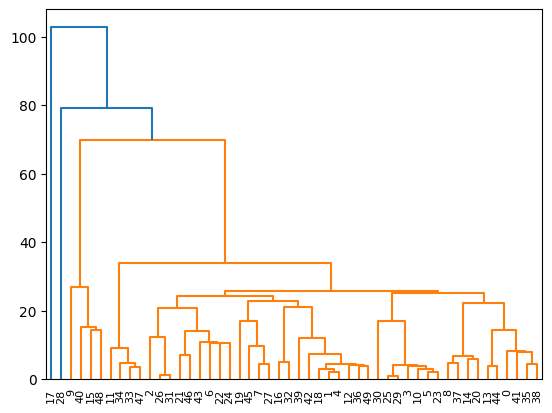

In [134]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(c2.values, c2.values))
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(DM))
plt.show()

In [135]:
c3 = df[["Life_Style_Index","Customer_Rating"]]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(c3)
model.labels_

array([2, 2, 2, ..., 0, 2, 0], dtype=int32)

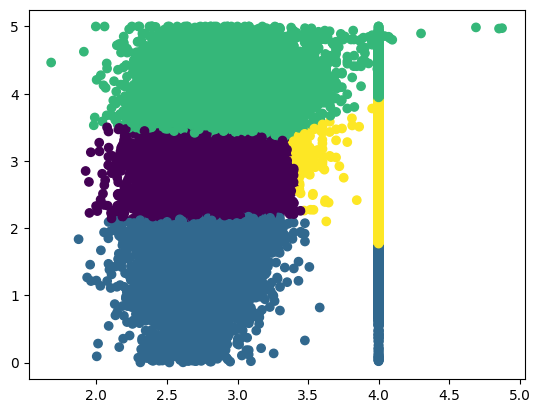

In [136]:
# scatter plot b/w Life_Style_Index and Customer rating
plt.scatter(c3.Life_Style_Index, c3.Customer_Rating, c=model.labels_)
plt.show()

In [137]:
c3 = df[["Life_Style_Index","Customer_Rating"]][0:50]
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(c3)
model.labels_

array([3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 3, 1, 0, 0, 0, 2, 0, 2, 3, 0, 0, 1,
       0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3,
       2, 1, 0, 3, 0, 0])

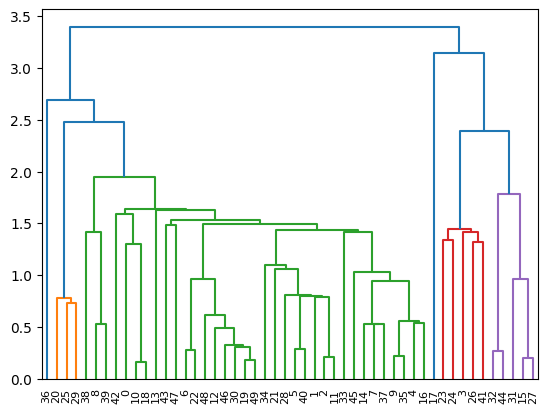

In [138]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(c3.values,c3.values))
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(DM))
plt.show()